In [97]:
import pandas as pd
from datetime import datetime
import numpy as np

a = pd.read_csv("data/200803.csv",header=None)
a.columns = ["#","Player","Pos","Birthday"]
a = a.drop(columns=["Pos"])
c = pd.read_csv('data/Arsenal.csv',header=[0,1])
def rename_columns(df):
    new_cols = []
    for col in df.columns:
        if "Unnamed:" in col[0]:
            new_cols.append(col[1])
        else:
            new_cols.append(col[0] + " " + col[1])
    df.columns = new_cols
    df["Player"] = df["Player"].apply(lambda x: x.split("\\")[0])
    # df["Nation"] = df["Nation"].apply(lambda x: x.split(" ")[0])
    df = df.drop(columns=['Matches'])
    return df
    
c = rename_columns(c)
c = c.drop(columns=c.columns.values[5:])
c = c.drop(columns=["Nation","Age"])
ars = pd.merge(c,a,how="outer",on="Player")

def get_age(s):
    bd = datetime.strptime(str(s), "%b %d %Y")
    now = datetime.now()
    return round((now - bd).days / 365,1)

ars['Age'] = ars["Birthday"].apply(get_age)
print(ars)

                       Player Pos   90s   #     Birthday   Age
0   Pierre-Emerick Aubameyang  FW  34.8  14  Jun 18 1989  31.1
1                  David Luiz  DF  31.2  23  Apr 22 1987  33.3
2                  Bernd Leno  GK  29.4   1  Mar 04 1992  28.4
3                Granit Xhaka  MF  28.7  34  Sep 27 1992  27.9
4                Nicolas Pépé  FW  22.3  19  May 29 1995  25.2
5         Alexandre Lacazette  FW  20.8   9  May 28 1991  29.2
6                 Bukayo Saka  MF  19.5   7  Sep 05 2001  18.9
7            Mattéo Guendouzi  MF  19.4  29  Apr 14 1999  21.3
8              Sead Kolasinac  DF  18.9  31  Jun 20 1993  27.1
9                    Sokratis  DF  18.8   5  Jun 09 1988  32.2
10              Dani Ceballos  MF  18.8   8  Aug 07 1996  24.0
11                 Mesut Özil  MF  16.0  10  Oct 15 1988  31.8
12             Lucas Torreira  MF  16.8  11  Feb 11 1996  24.5
13     Ainsley Maitland-Niles  DF  15.4  15  Aug 29 1997  22.9
14           Shkodran Mustafi  DF  13.4  20  Apr 17 199

In [98]:
ars["90s"] = ars["90s"].replace(np.nan, 0)
print(ars)

                       Player Pos   90s   #     Birthday   Age
0   Pierre-Emerick Aubameyang  FW  34.8  14  Jun 18 1989  31.1
1                  David Luiz  DF  31.2  23  Apr 22 1987  33.3
2                  Bernd Leno  GK  29.4   1  Mar 04 1992  28.4
3                Granit Xhaka  MF  28.7  34  Sep 27 1992  27.9
4                Nicolas Pépé  FW  22.3  19  May 29 1995  25.2
5         Alexandre Lacazette  FW  20.8   9  May 28 1991  29.2
6                 Bukayo Saka  MF  19.5   7  Sep 05 2001  18.9
7            Mattéo Guendouzi  MF  19.4  29  Apr 14 1999  21.3
8              Sead Kolasinac  DF  18.9  31  Jun 20 1993  27.1
9                    Sokratis  DF  18.8   5  Jun 09 1988  32.2
10              Dani Ceballos  MF  18.8   8  Aug 07 1996  24.0
11                 Mesut Özil  MF  16.0  10  Oct 15 1988  31.8
12             Lucas Torreira  MF  16.8  11  Feb 11 1996  24.5
13     Ainsley Maitland-Niles  DF  15.4  15  Aug 29 1997  22.9
14           Shkodran Mustafi  DF  13.4  20  Apr 17 199

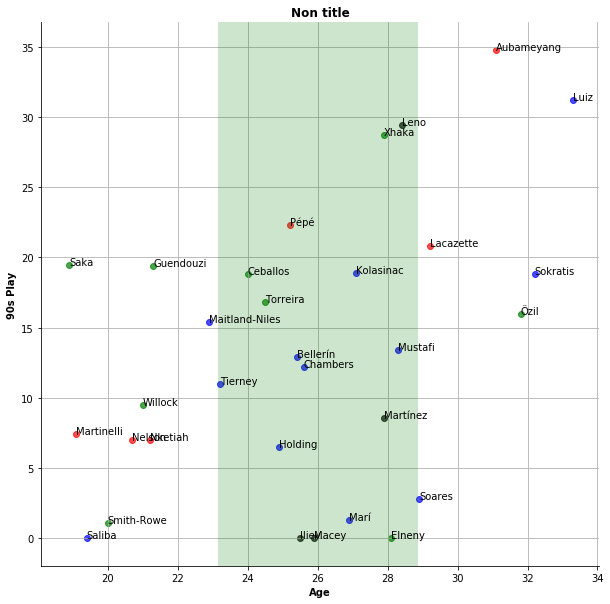

In [108]:
import matplotlib.pyplot as plt

x = []
y = []
t = []
poss = ["GK","DF","MF","FW"]
colors = ["black","b","g","r"]
for pos in poss:
    x.append(ars[ars["Pos"].str.contains(pos)]["Age"].values)
    y.append(ars[ars["Pos"].str.contains(pos)]["90s"].values)
    t.append(ars[ars["Pos"].str.contains(pos)]["Player"].values)

fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor("white")
for i in range(len(poss)):
    ax.scatter(x[i], y[i], alpha=0.7, color=colors[i])
    for x1, y1,t1 in zip(x[i],y[i],t[i]):
        ax.annotate(t1.split(" ")[-1], (x1, y1))
    
ax.set_xlabel('Age',fontweight="bold")
ax.set_ylabel('90s Play',fontweight="bold")
ax.set_title('Non title',fontweight="bold")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor("white")
plt.grid(True)
# ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
# for x1, y1,t1 in zip(x,y,ars["Player"]):
#     ax.annotate(t1.split(" ")[-1], (x1, y1))

# ax.annotate("@MyFootballramble", (30,5),fontweight="bold",alpha=0.7,c="grey")
# ax.hlines(2,5,35)
# ax.vlines(15,1,5)
# ax.fill_between([24,30], [0,35])
ax.axvline(26, color='green', lw=200, alpha=0.2)
plt.show()